Project 2
Thiago Viegas & Diego Rosenberg

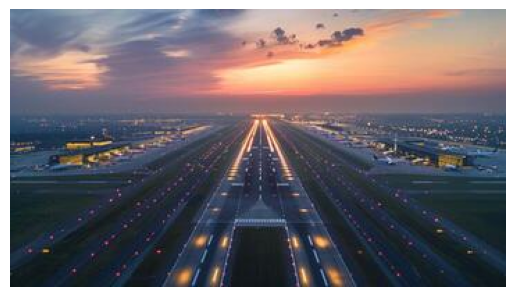

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('question1/runaway.jpeg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

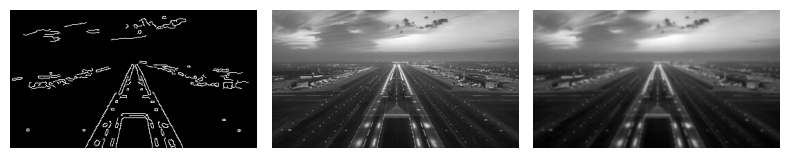

In [3]:
#Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel_size = (5,5)

sigmaX_low = 2
sigmaX_high = 5

sigmaY_low = 2
sigmaY_high = 5

#Apply Gaussian blur
image_blur = cv2.GaussianBlur(image_gray, kernel_size, 0)

#Perform Canny edge detection
edges = cv2.Canny(image_blur, 75, 150)

fig, axes = plt.subplots(1, 3, figsize=(8, 8))
axes[0].imshow(edges, cmap='gray')
axes[0].axis('off')

axes[1].imshow(image_gray, cmap='gray')
axes[1].axis('off')

axes[2].imshow(image_blur, cmap='gray')
axes[2].axis('off')

plt.tight_layout()
plt.show()


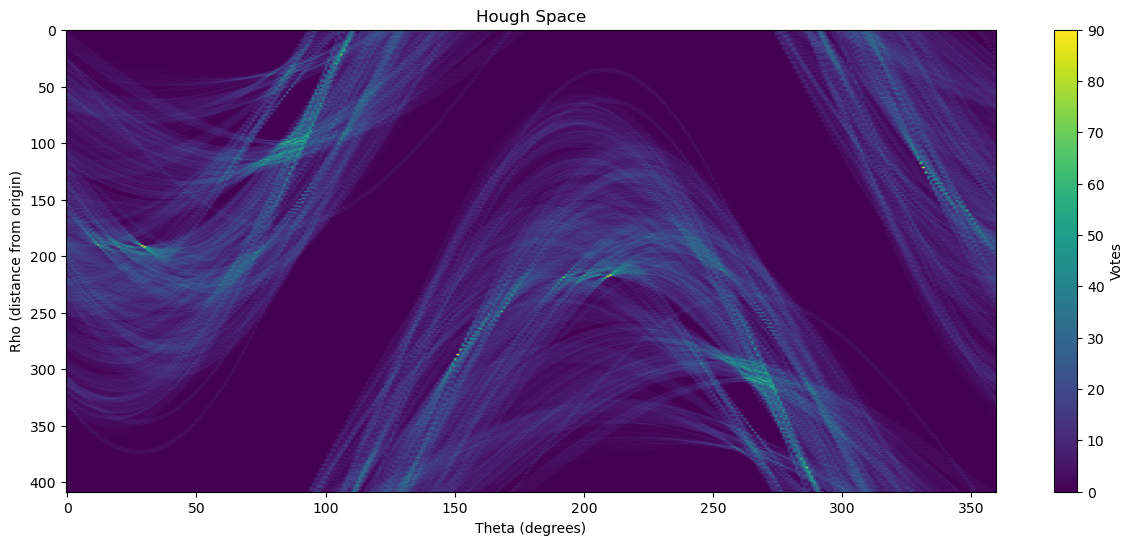

In [4]:
#will do Hough Transform to detect lines in the image
hough_space = np.zeros((int(np.sqrt(edges.shape[0]**2 + edges.shape[1]**2)), 360), dtype=np.uint64)

#create theta values
thetas = np.deg2rad(np.arange(0, 360))

#Get coordinates of edge points
edge_points = np.argwhere(edges)

#Vote in Hough space
for y, x in edge_points:
    for theta_idx in range(len(thetas)):
        theta = thetas[theta_idx]
        rho = int(x * np.cos(theta) + y * np.sin(theta))
        hough_space[rho, theta_idx] += 1


plt.figure(figsize=(15, 6))
plt.imshow(hough_space, cmap='viridis', aspect='auto')
plt.title('Hough Space')
plt.xlabel('Theta (degrees)')
plt.ylabel('Rho (distance from origin)')
plt.colorbar(label='Votes')
plt.show()

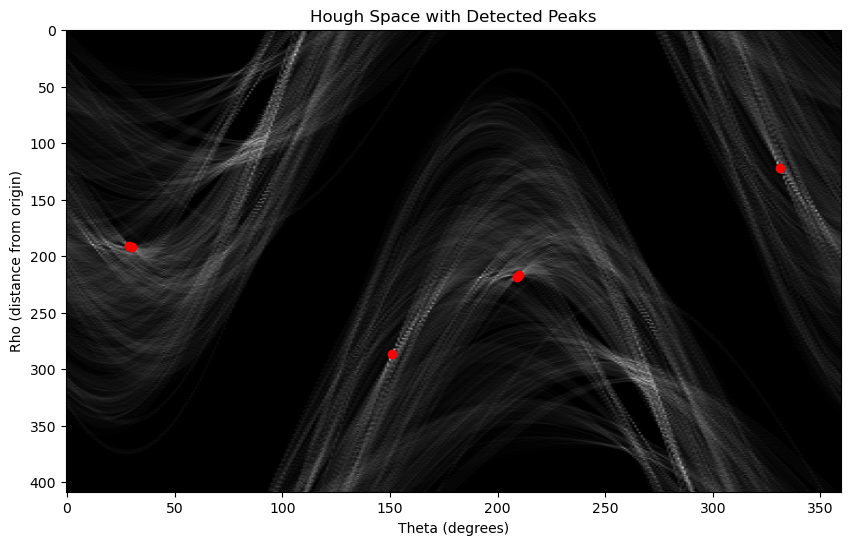

In [5]:
threshold = 75
peaks = np.argwhere(hough_space > threshold)


plt.figure(figsize=(10, 6))
plt.imshow(hough_space, cmap='gray', aspect='auto')
plt.scatter(peaks[:, 1], peaks[:, 0], color='red')
plt.title('Hough Space with Detected Peaks')
plt.xlabel('Theta (degrees)')
plt.ylabel('Rho (distance from origin)')
plt.show()

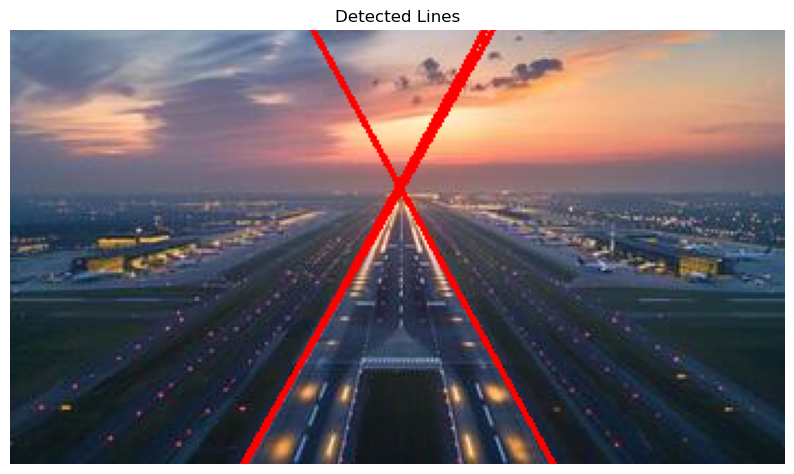

In [6]:
output_image = image.copy()

for rho, theta_idx in peaks:
    theta = thetas[theta_idx]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Detected Lines')
plt.show()

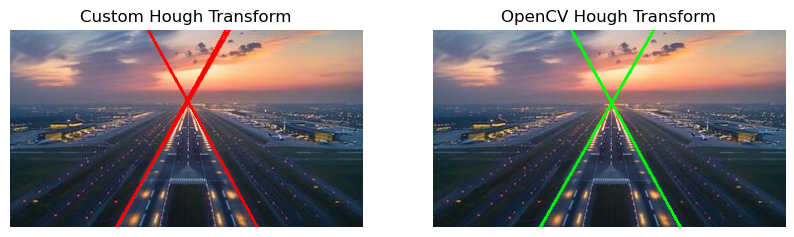

In [7]:
#Will try cv2 builtin Hough Transform for comparison
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold)
output_image_builtin = image.copy()

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(output_image_builtin, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Custom Hough Transform')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_image_builtin, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('OpenCV Hough Transform')
plt.show()



Question 1 - Part B

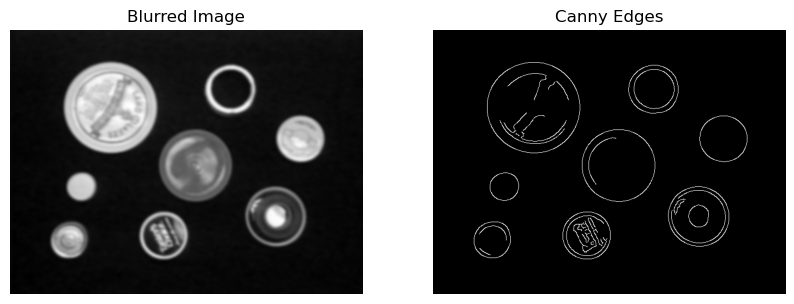

In [8]:
coins1 = cv2.imread('question1/circles1.gif', cv2.IMREAD_GRAYSCALE)

#images are already gray scaled so no need to convert
blurred_coins1 = cv2.GaussianBlur(coins1, (13,13), 0)

edges = cv2.Canny(blurred_coins1, 100, 150)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blurred_coins1, cmap='gray')
plt.axis('off')
plt.title('Blurred Image')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Canny Edges')
plt.show()


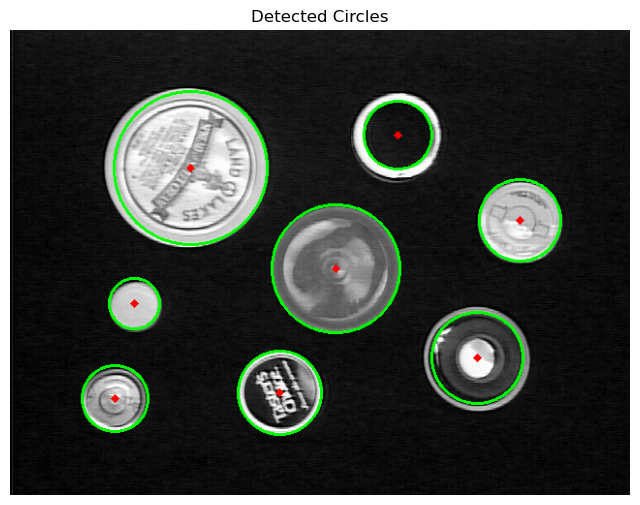

In [9]:
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=25, param1=100, param2=28, minRadius=15, maxRadius=80)

if circles is not None:
    circles = np.uint16(np.around(circles))
    output_image_circles = cv2.cvtColor(coins1, cv2.COLOR_GRAY2BGR)

    for i in circles[0, :]:
        cv2.circle(output_image_circles, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(output_image_circles, (i[0], i[1]), 2, (0, 0, 255), 3)

    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(output_image_circles, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Detected Circles')
    plt.show()
else:
    print("No circles were detected.")

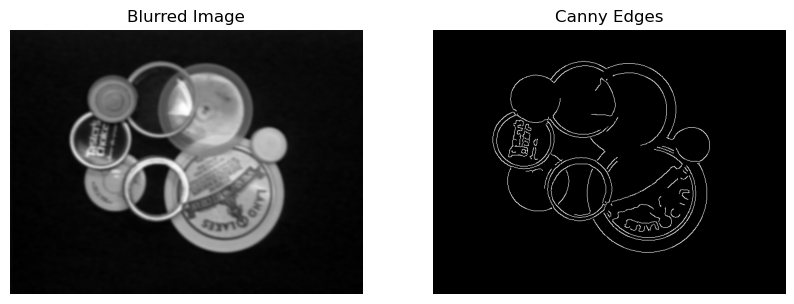

In [10]:
coins2 = cv2.imread('question1/circles2.gif', cv2.IMREAD_GRAYSCALE)

blurred_coins2 = cv2.GaussianBlur(coins2, (11,11), 0)
edges2 = cv2.Canny(blurred_coins2, 100, 150)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blurred_coins2, cmap='gray')
plt.axis('off')
plt.title('Blurred Image')
plt.subplot(1, 2, 2)
plt.imshow(edges2, cmap='gray')
plt.axis('off')
plt.title('Canny Edges')
plt.show()

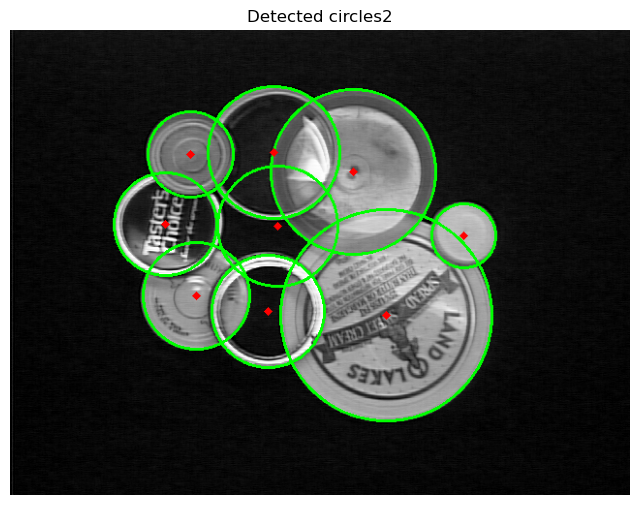

In [11]:
circles2 = cv2.HoughCircles(edges2, cv2.HOUGH_GRADIENT, dp=1, minDist=75, param1=65, param2=28, minRadius=25, maxRadius=130)

if circles2 is not None:
    circles2 = np.uint16(np.around(circles2))
    output_image_circles2 = cv2.cvtColor(coins2, cv2.COLOR_GRAY2BGR)

    for i in circles2[0, :]:
        cv2.circle(output_image_circles2, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(output_image_circles2, (i[0], i[1]), 2, (0, 0, 255), 3)

    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(output_image_circles2, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Detected circles2')
    plt.show()
else:
    print("No circles2 were detected.")

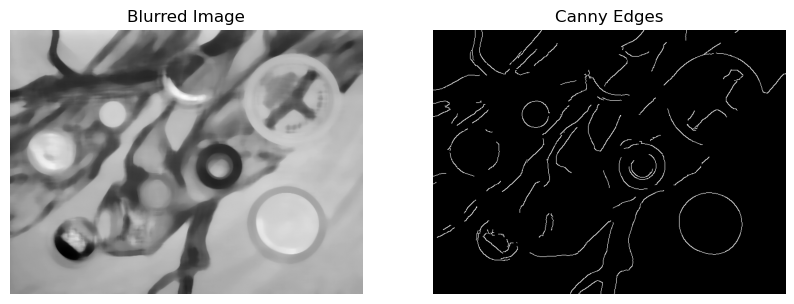

In [12]:
coins3 = cv2.imread('question1/circles3.gif', cv2.IMREAD_GRAYSCALE)

median_coins = cv2.medianBlur(coins3, 17)
#blurred_coins3 = cv2.GaussianBlur(median_coins, (9,9), 0)

edges3 = cv2.Canny(median_coins, 85, 150)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(median_coins, cmap='gray')
plt.axis('off')
plt.title('Blurred Image')
plt.subplot(1, 2, 2)
plt.imshow(edges3, cmap='gray')
plt.axis('off')
plt.title('Canny Edges')

plt.show()

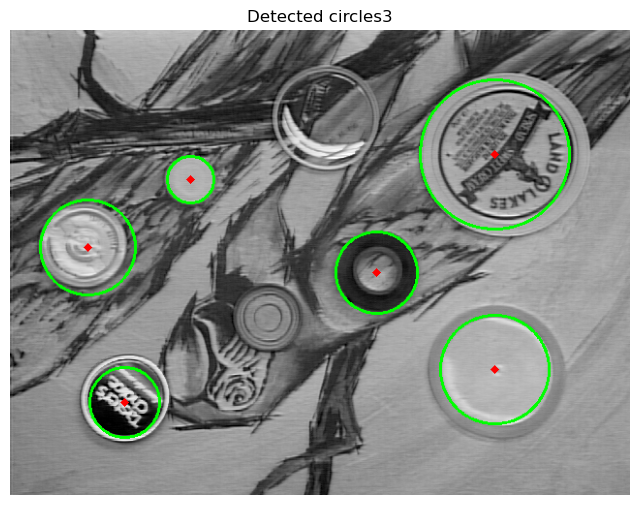

In [13]:
circles3 = cv2.HoughCircles(edges3, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=30, param2=25, minRadius=10, maxRadius=110)


if circles3 is not None:
    circles3 = np.uint16(np.around(circles3))
    output_image_circles3 = cv2.cvtColor(coins3, cv2.COLOR_GRAY2BGR)

    for i in circles3[0, :]:
        cv2.circle(output_image_circles3, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(output_image_circles3, (i[0], i[1]), 2, (0, 0, 255), 3)

    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(output_image_circles3, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Detected circles3')
    plt.show()

###Question 3

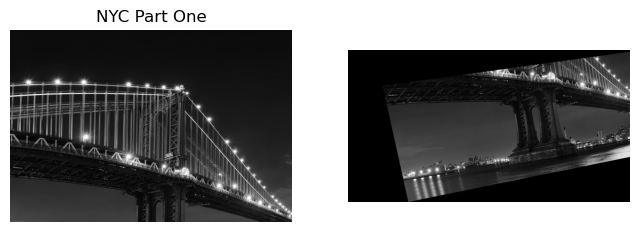

In [14]:
nyc_part_one = cv2.imread('question3/new-york-city_part1.jpg',  cv2.COLOR_BGR2RGB)
nyc_part_two = cv2.imread('question3/new-york-city_part2_DISTORTED.jpg',  cv2.COLOR_BGR2RGB)

nyc_gray = cv2.cvtColor(nyc_part_one, cv2.COLOR_RGB2GRAY)
nyc_gray_two = cv2.cvtColor(nyc_part_two, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(nyc_gray, cmap='gray')
plt.axis('off')
plt.title('NYC Part One')
plt.subplot(1, 2, 2)
plt.imshow(nyc_gray_two, cmap='gray')
plt.axis('off')
plt.show()


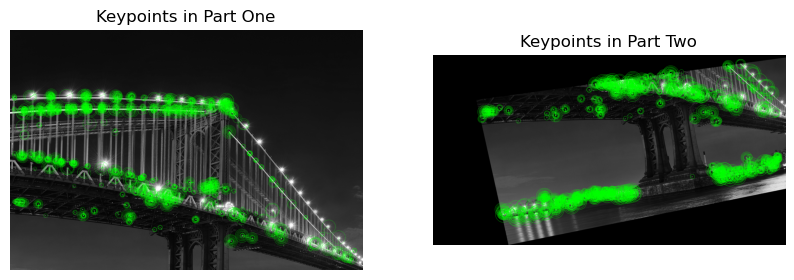

In [15]:
#Initalize ORB detector
orb = cv2.ORB_create(nfeatures=2000)

#Find keypoints and descriptors
keypoints1, descriptors1 = orb.detectAndCompute(nyc_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(nyc_gray_two, None)

#Visualize keypoints
image_keypoints1 = cv2.drawKeypoints(nyc_gray, keypoints1, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image_keypoints2 = cv2.drawKeypoints(nyc_gray_two, keypoints2, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_keypoints1)
plt.axis('off')
plt.title('Keypoints in Part One')
plt.subplot(1, 2, 2)
plt.imshow(image_keypoints2)
plt.axis('off')
plt.title('Keypoints in Part Two')
plt.show()

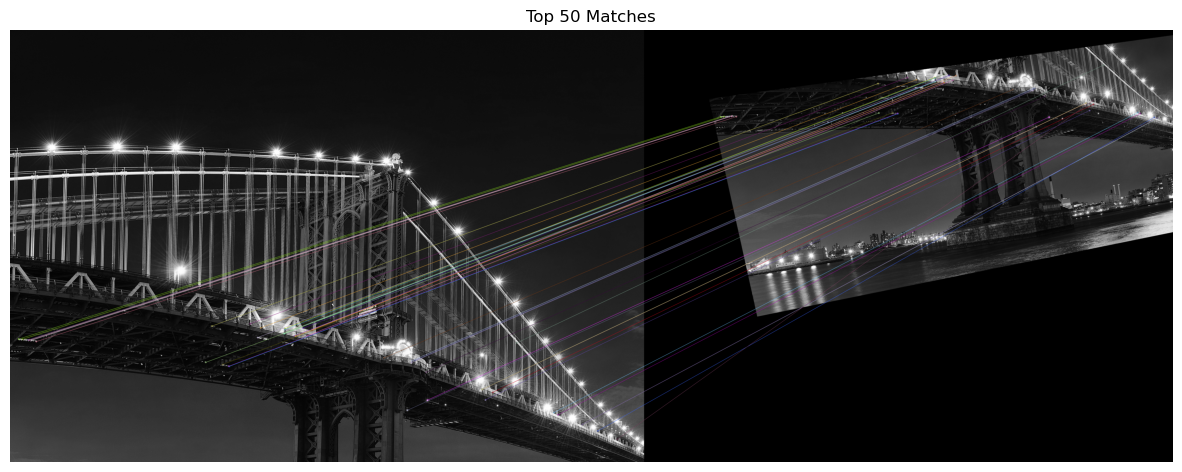

In [16]:
#Create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

#Match descriptors
matches = bf.match(descriptors1, descriptors2)

#Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

#Draw top matches
matched_image = cv2.drawMatches(nyc_gray, keypoints1, nyc_gray_two, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15, 10))
plt.imshow(matched_image)
plt.axis('off')
plt.title('Top 50 Matches')
plt.show()


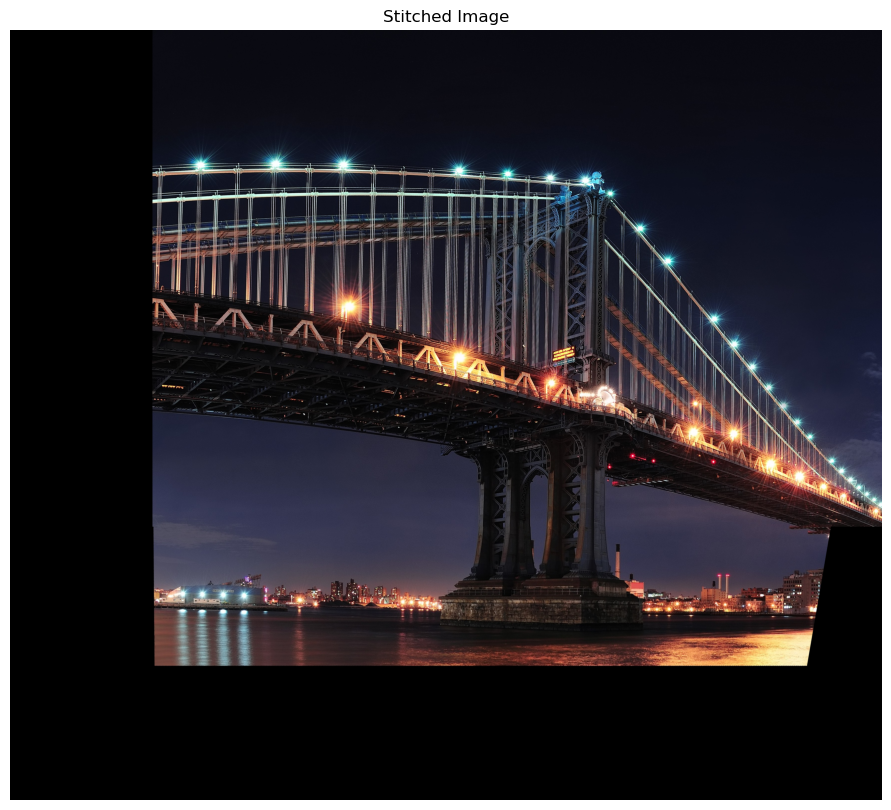

In [17]:
#now to find homography and stitch images
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

H, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

height1, width1 = nyc_part_one.shape[:2]
height2, width2 = nyc_part_two.shape[:2]

corners_part_two = np.float32([[0, 0], [0, height2], [width2, height2], [width2, 0]]).reshape(-1, 1, 2)
transformed_corners = cv2.perspectiveTransform(corners_part_two, H)

all_corners = np.concatenate((np.float32([[0, 0], [0, height1], [width1, height1], [width1, 0]]).reshape(-1, 1, 2), transformed_corners), axis=0)

[x_min, y_min] = np.int32(all_corners.min(axis=0).ravel() - 0.5)
[x_max, y_max] = np.int32(all_corners.max(axis=0).ravel() + 0.5)

translation_dist = [-x_min, -y_min]
H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

stitched_image = cv2.warpPerspective(nyc_part_two, H_translation.dot(H), (x_max - x_min, y_max - y_min))
stitched_image[translation_dist[1]:height1 + translation_dist[1], translation_dist[0]:width1 + translation_dist[0]] = nyc_part_one

stitched_rgb = cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.imshow(stitched_rgb)
plt.axis('off')
plt.title('Stitched Image')
plt.show()

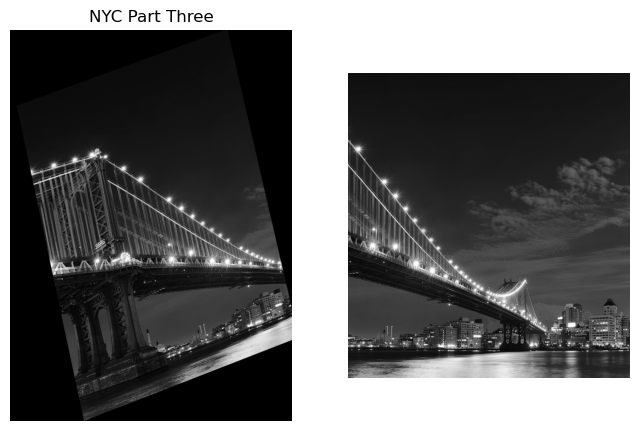

In [18]:
#now do the same with part3 and 4
nyc_part_three = cv2.imread('question3/new-york-city_part3_DISTORTED.jpg',  cv2.COLOR_BGR2RGB)
nyc_part_four = cv2.imread('question3/new-york-city_part4.jpg',  cv2.COLOR_BGR2RGB)

nyc_gray_three = cv2.cvtColor(nyc_part_three, cv2.COLOR_RGB2GRAY)
nyc_gray_four = cv2.cvtColor(nyc_part_four, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(nyc_gray_three, cmap='gray')
plt.axis('off')
plt.title('NYC Part Three')
plt.subplot(1, 2, 2)
plt.imshow(nyc_gray_four, cmap='gray')
plt.axis('off')
plt.show()

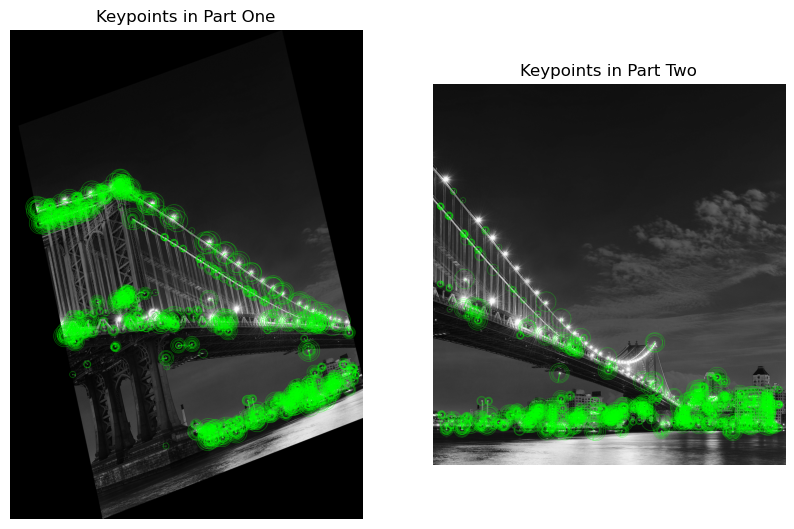

In [19]:
#Initalize ORB detector
orb = cv2.ORB_create(nfeatures=2000)

#Find keypoints and descriptors
keypoints3, descriptors3 = orb.detectAndCompute(nyc_gray_three, None)
keypoints4, descriptors4 = orb.detectAndCompute(nyc_gray_four, None)

#Visualize keypoints
image_keypoints1 = cv2.drawKeypoints(nyc_gray_three, keypoints3, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image_keypoints2 = cv2.drawKeypoints(nyc_gray_four, keypoints4, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image_keypoints1)
plt.axis('off')
plt.title('Keypoints in Part One')
plt.subplot(1, 2, 2)
plt.imshow(image_keypoints2)
plt.axis('off')
plt.title('Keypoints in Part Two')
plt.show()

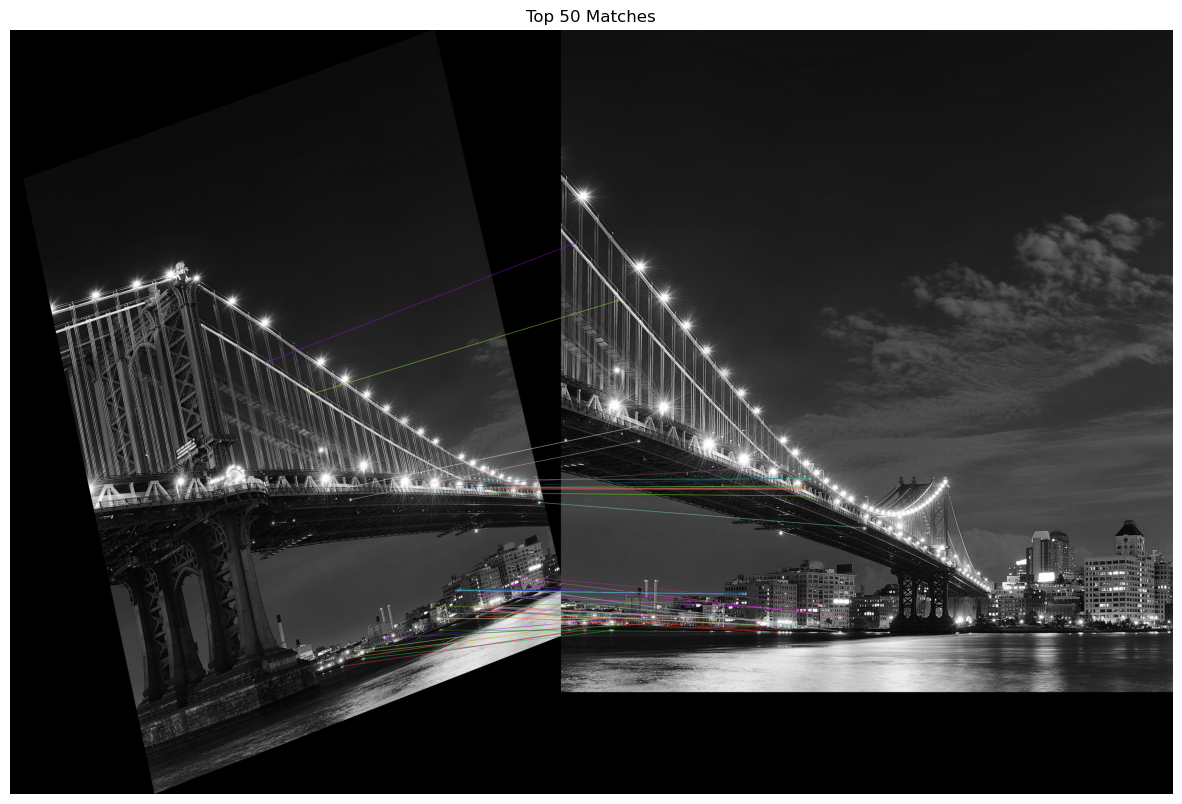

In [20]:
#Create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

#Match descriptors
matches = bf.match(descriptors3, descriptors4)

#Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

#Draw top matches
matched_image = cv2.drawMatches(nyc_gray_three, keypoints3, nyc_gray_four, keypoints4, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15, 10))
plt.imshow(matched_image)
plt.axis('off')
plt.title('Top 50 Matches')
plt.show()

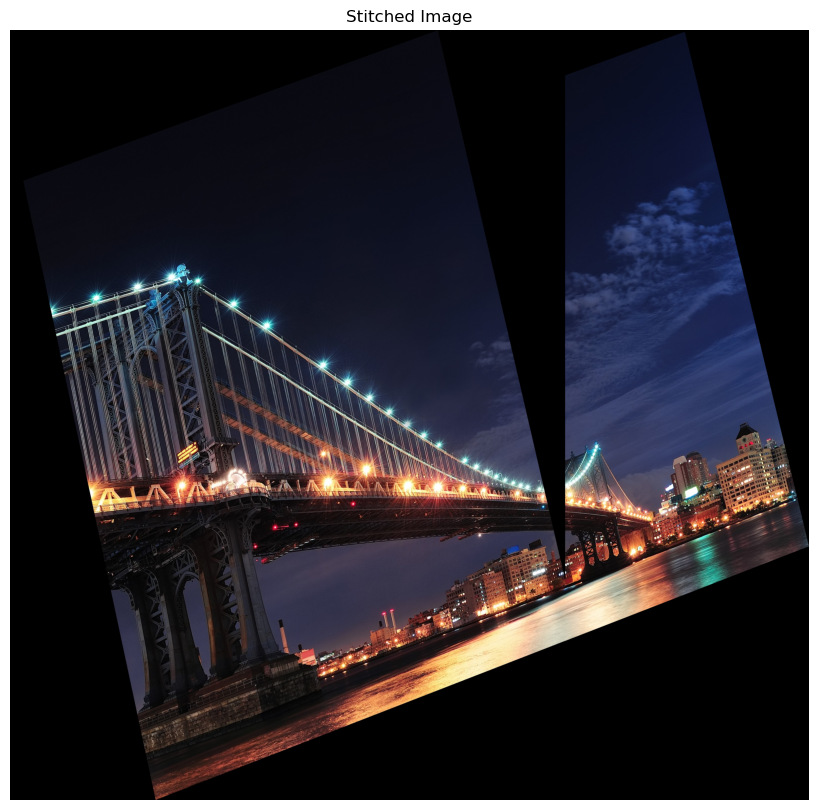

In [21]:
src_pts = np.float32([keypoints3[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints4[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

H, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

height1, width1 = nyc_part_three.shape[:2]
height2, width2 = nyc_part_four.shape[:2]

corners_part_two = np.float32([[0, 0], [0, height2], [width2, height2], [width2, 0]]).reshape(-1, 1, 2)
transformed_corners = cv2.perspectiveTransform(corners_part_two, H)

all_corners = np.concatenate((np.float32([[0, 0], [0, height1], [width1, height1], [width1, 0]]).reshape(-1, 1, 2), transformed_corners), axis=0)

[x_min, y_min] = np.int32(all_corners.min(axis=0).ravel() - 0.5)
[x_max, y_max] = np.int32(all_corners.max(axis=0).ravel() + 0.5)

translation_dist = [-x_min, -y_min]
H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0, 0, 1]])

stitched_image = cv2.warpPerspective(nyc_part_four, H_translation.dot(H), (x_max - x_min, y_max - y_min))
stitched_image[translation_dist[1]:height1 + translation_dist[1], translation_dist[0]:width1 + translation_dist[0]] = nyc_part_three

stitched_rgb = cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.imshow(stitched_rgb)
plt.axis('off')
plt.title('Stitched Image')
plt.show()

Question 4

Image: stock-photo-killer-whale-orcinus-orca-pair-leaping-canada-1635615292.jpg2625360
Image: premium_photo-1724668625323-ccd85574c6b9.png7110988
Circle center: (1390, 1029)
Image: tigers.jpg73731


(np.float64(-0.5), np.float64(2999.5), np.float64(1999.5), np.float64(-0.5))

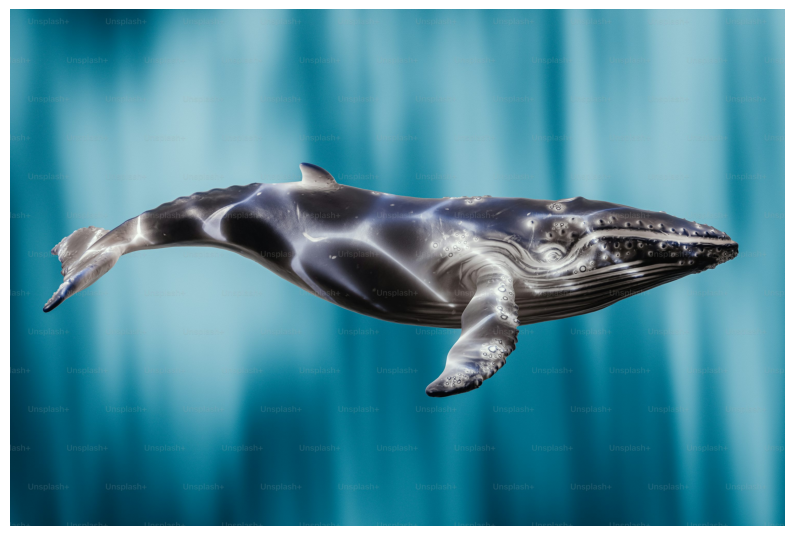

In [95]:
whale_one = cv2.imread('question4/whale_one.png', cv2.IMREAD_COLOR)
whale_one = cv2.cvtColor(whale_one, cv2.COLOR_BGR2RGB)

h, w = whale_one.shape[:2]

import json

with open('question4/point_annotations.json', 'r') as f:
    annotations = json.load(f)

cx, cy = None, None
for image_key, image_data in annotations.items():
    print(f"Image: {image_key}")

    if image_key != 'premium_photo-1724668625323-ccd85574c6b9.png7110988':        
        continue
    for region in image_data['regions']:
        shape_attributes = region['shape_attributes']
        cx = shape_attributes['cx']
        cy = shape_attributes['cy']
        print(f"Circle center: ({cx}, {cy})")
        

plt.figure(figsize=(10, 10))
plt.imshow(whale_one)
plt.axis('off')

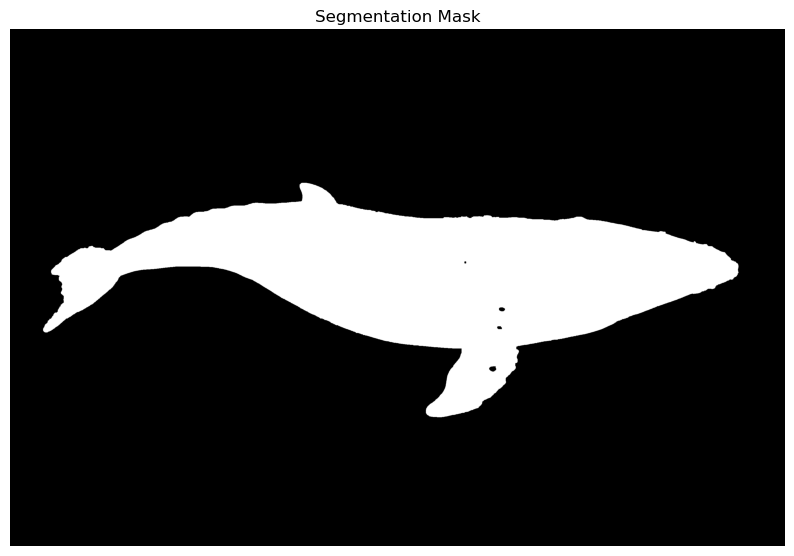

In [145]:
def grabcut_from_click(bgr, click_xy, fg_radius=8, bg_border=15, iters=5):
    h, w = bgr.shape[:2]
    x, y = int(click_xy[0]), int(click_xy[1])

    # 0: sure BG, 1: sure FG, 2: probable BG, 3: probable FG
    mask = np.full((h, w), cv2.GC_PR_BGD, np.uint8)

    # sure background = frame along the borders
    mask[:bg_border, :] = cv2.GC_BGD
    mask[-bg_border:, :] = cv2.GC_BGD
    mask[:, :bg_border] = cv2.GC_BGD
    mask[:, -bg_border:] = cv2.GC_BGD

    # sure foreground = a small disk around the click
    yy, xx = np.ogrid[:h, :w]
    disk = (xx - x)**2 + (yy - y)**2 <= fg_radius**2
    mask[disk] = cv2.GC_FGD

    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)
    cv2.grabCut(bgr, mask, None, bgdModel, fgdModel, iters, cv2.GC_INIT_WITH_MASK)

    # final matte
    seg = np.where((mask == cv2.GC_FGD) | (mask == cv2.GC_PR_FGD), 1, 0).astype(np.uint8)

    # small cleanup
    seg = cv2.morphologyEx(seg, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))
    seg = cv2.morphologyEx(seg, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))

    return seg  # 1 = foreground, 0 = background


segmentation = grabcut_from_click(whale_one[:, :, ::-1], (cx, cy), fg_radius=50, bg_border=10, iters=10)
plt.figure(figsize=(10, 10))
plt.imshow(segmentation, cmap='gray')
plt.axis('off')
plt.title('Segmentation Mask')
plt.show()

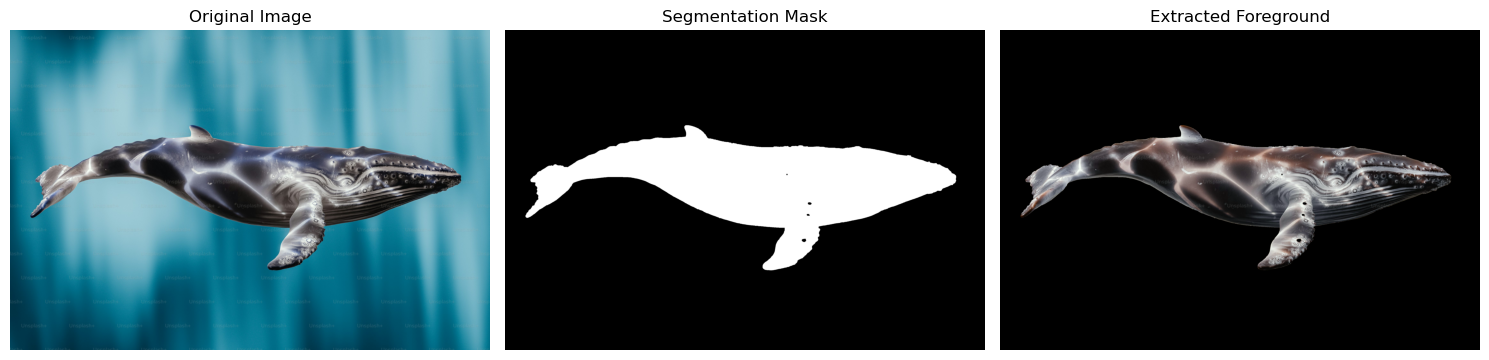

In [148]:
# --- Convert mask to uint8 ---
mask = (segmentation * 255).astype(np.uint8)

# --- Apply mask to image ---
foreground = cv2.bitwise_and(whale_one, whale_one, mask=mask)

# --- Crop to whale’s bounding box ---
ys, xs = np.where(mask > 0)
y_min, y_max = ys.min(), ys.max()
x_min, x_max = xs.min(), xs.max()
cropped_whale = foreground[y_min:y_max+1, x_min:x_max+1]
cropped_mask = mask[y_min:y_max+1, x_min:x_max+1]

# --- Create transparent PNG (optional) ---
rgba = cv2.cvtColor(cropped_whale, cv2.COLOR_BGR2BGRA)
rgba[:, :, 3] = cropped_mask
cv2.imwrite("whale_transparent.png", rgba)

# --- Plot results ---
fig, axes = plt.subplots(1, 3, figsize=(15, 6))


axes[0].imshow(whale_one)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(mask, cmap="gray")
axes[1].set_title("Segmentation Mask")
axes[1].axis("off")

axes[2].imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
axes[2].set_title("Extracted Foreground")
axes[2].axis("off")

plt.tight_layout()
plt.show()


Image: stock-photo-killer-whale-orcinus-orca-pair-leaping-canada-1635615292.jpg2625360
Circle center: (510, 386)
Circle center: (832, 500)
[510, 832] [386, 500]
Image: premium_photo-1724668625323-ccd85574c6b9.png7110988
Image: tigers.jpg73731


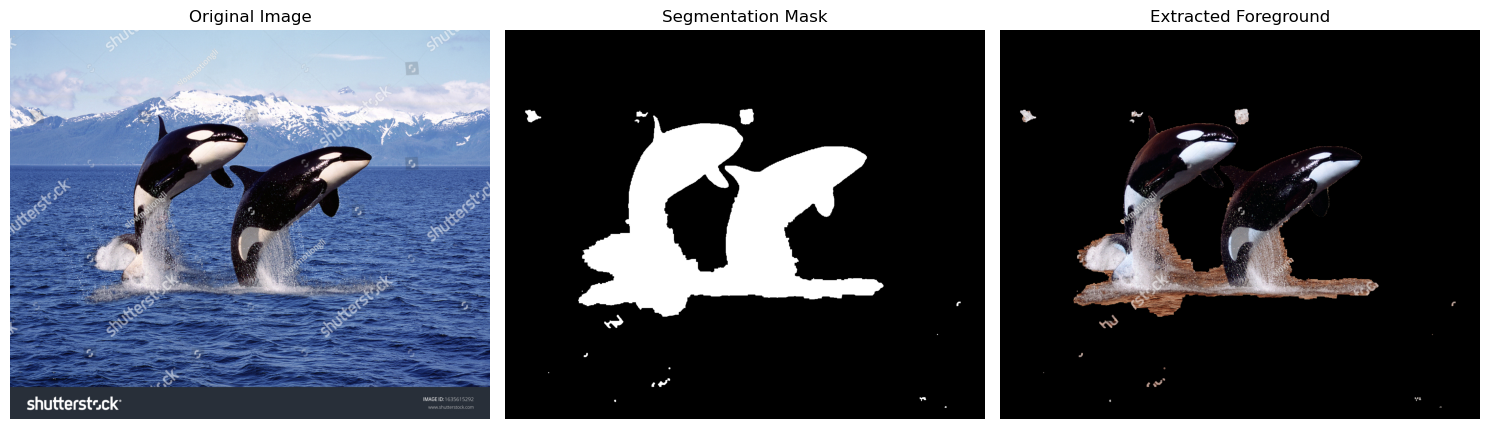

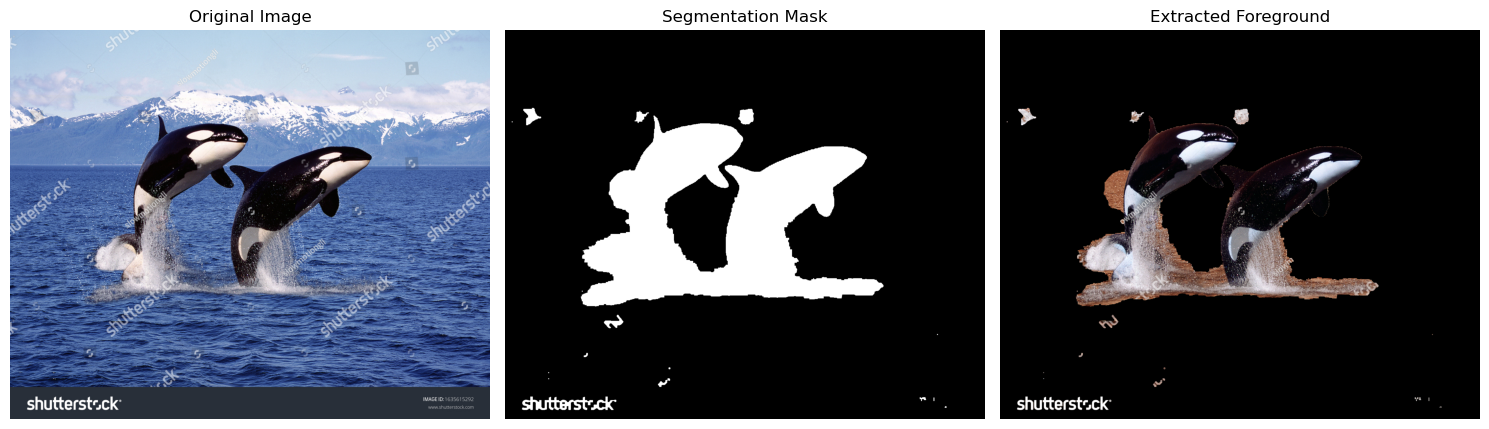

In [171]:
killer_whale = cv2.imread('question4/killer-whale.jpg', cv2.IMREAD_COLOR)
killer_whale = cv2.cvtColor(killer_whale, cv2.COLOR_BGR2RGB)

with open ('question4/point_annotations.json', 'r') as f:
    annotations_killer = json.load(f)

cx_killer, cy_killer = [], []
for image_key, image_data in annotations_killer.items():
    print(f"Image: {image_key}")

    if image_key != 'stock-photo-killer-whale-orcinus-orca-pair-leaping-canada-1635615292.jpg2625360':        
        continue
    for region in image_data['regions']:
        shape_attributes = region['shape_attributes']
        cx_killer.append(shape_attributes['cx'])
        cy_killer.append(shape_attributes['cy'])
        print(f"Circle center: ({shape_attributes['cx']}, {shape_attributes['cy']})")

    print(cx_killer, cy_killer)


for x, y in cx_killer, cy_killer:

    segmentation_killer = grabcut_from_click(killer_whale[:, :, ::-1], (x, y), fg_radius=60, bg_border=10, iters=10)


    # --- Convert mask to uint8 ---
    mask_killer = (segmentation_killer * 255).astype(np.uint8)

    # --- Apply mask to image ---
    foreground_killer = cv2.bitwise_and(killer_whale, killer_whale, mask=mask_killer)

    # --- Crop to whale’s bounding box ---
    ys_killer, xs_killer = np.where(mask_killer > 0)
    y_min_killer, y_max_killer = ys_killer.min(), ys_killer.max()
    x_min_killer, x_max_killer = xs_killer.min(), xs_killer.max()
    cropped_whale_killer = foreground_killer[y_min_killer:y_max_killer+1, x_min_killer:x_max_killer+1]
    cropped_mask_killer = mask_killer[y_min_killer:y_max_killer+1, x_min_killer:x_max_killer+1]

    # --- Create transparent PNG (optional) ---
    rgba_killer = cv2.cvtColor(cropped_whale_killer, cv2.COLOR_BGR2BGRA)
    rgba_killer[:, :, 3] = cropped_mask_killer
    cv2.imwrite("killer_whale_transparent.png", rgba_killer)

    # --- Plot results ---
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))


    axes[0].imshow(killer_whale)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(mask_killer, cmap="gray")
    axes[1].set_title("Segmentation Mask")
    axes[1].axis("off")

    axes[2].imshow(cv2.cvtColor(foreground_killer, cv2.COLOR_BGR2RGB))
    axes[2].set_title("Extracted Foreground")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show() 

